# Exploratory Data Analysis
Examine (by hand or collecting simple statistics) the train dataset and try to infer general rules that are right in most cases, even if they seldom apply (high precision, low recall).

In [16]:
import sys
from os import listdir
import xml.etree.ElementTree as ET
import string
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (20, 10)

In [4]:
datadir = "/Users/mponsclo/Downloads/labAHLT/data/train"
#datadir = "../labAHLT/data/train"
df = pd.DataFrame() # initialize Data Frame

for f in listdir(datadir):
        try:
            filename = datadir + "/" + f
            tree = ET.parse(filename) # Some file rose an error when parsing
            root = tree.getroot()
        
            for elem in root:
                for subelem in elem.findall('entity'):
                    aux_df = pd.DataFrame({'Name': subelem.get('text'), 'Type': subelem.get('type')}, index=[0])
                    df = df.append(aux_df)
        except:
            continue

In [5]:
print(f'Total DF rows: {df.shape[0]}')
print('Number of rows with UPPERCASE: {}'.format(df['Name'].str.isupper().sum()))
print('Number of rows with Title Case: {}'.format(df['Name'].str.istitle().sum()))
print('Number of rows containing numbers: {}'.format(df.shape[0] - df['Name'].str.isalpha().sum()))

Total DF rows: 11627
Number of rows with UPPERCASE: 963
Number of rows with Title Case: 1781
Number of rows containing numbers: 2071


In [6]:
# Analysis of Types

group = df[df["Type"] == "group"]
brand = df[df["Type"] == "brand"]
drug = df[(df["Type"]=='drug')]
drug_n = df[df["Type"]== "drug_n"]

group_counts = pd.DataFrame({'Count' : group['Name'].value_counts()})
brand_counts = pd.DataFrame({'Count' : brand['Name'].value_counts()})
drug_counts = pd.DataFrame({'Count' : drug['Name'].value_counts()})
drug_n_counts = pd.DataFrame({'Count' : drug_n['Name'].value_counts()})

print(drug_n_counts.head(10))

                                                  Count
PCP                                                  22
18-MC                                                16
ibogaine                                             14
1-methyl-4-phenyl-1,2,3,6-tetrahydropyridine         13
MHD                                                  12
endotoxin                                            11
dmPGE2                                               10
toxin A                                               9
beta-endorphin                                        9
3-[(2-methyl-1,3-thiazol-4-yl) ethynyl] pyridine      8


In [7]:
# Convert index to column for visual analysis

drug_counts['Name'] = drug_counts.index
drug_counts = drug_counts[["Name", "Count"]]

drug_n_counts['Name'] = drug_n_counts.index
drug_n_counts = drug_n_counts[["Name", "Count"]]

group_counts['Name'] = group_counts.index
group_counts = group_counts[["Name", "Count"]]

brand_counts['Name'] = brand_counts.index
brand_counts = brand_counts[["Name", "Count"]]

# Save files for inspection
#drug_counts.to_csv(r'/Users/mponsclo/Desktop/Drug_count.csv', index = False)
#drug_n_counts.to_csv(r'/Users/mponsclo/Desktop/Drug_n_count.csv', index = False)
#group_counts.to_csv(r'/Users/mponsclo/Desktop/Group_count.csv', index = False)
#brand_counts.to_csv(r'/Users/mponsclo/Desktop/Brand_count.csv', index = False)

#print(drug['Name'].str.isupper().sum())

0.029039463886820552
0.5751295336787565
0.27893738140417457


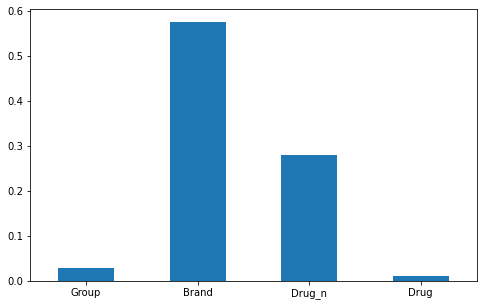

In [13]:
df2 = pd.DataFrame({'lab' : ['Group', 'Brand', 'Drug_n', 'Drug'], 'Count' : [group['Name'].str.isupper().sum()/group.shape[0],
                                                                            brand['Name'].str.isupper().sum()/brand.shape[0],
                                                                            drug_n['Name'].str.isupper().sum()/drug_n.shape[0],
                                                                            drug['Name'].str.isupper().sum()/drug.shape[0]]})

ax = df2.plot.bar(x='lab', y = 'Count', figsize = (8,5), rot=0, legend = False)
ax.set_xlabel("")

print(group['Name'].str.isupper().sum()/group.shape[0])
print(brand['Name'].str.isupper().sum()/brand.shape[0])
print(drug_n['Name'].str.isupper().sum()/drug_n.shape[0])
#print(drug['Name'].str.isupper().sum())

Text(0.5, 0, '')

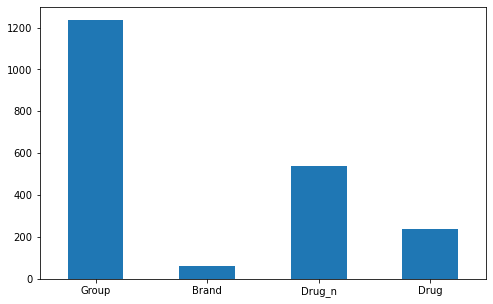

In [14]:
#print(group.shape[0] - group['Name'].str.isalpha().sum())
#print(brand.shape[0] - brand['Name'].str.isalpha().sum())
#print(drug.shape[0] - drug['Name'].str.isalpha().sum())
#print(drug_n.shape[0] - drug_n['Name'].str.isalpha().sum())

df3 = pd.DataFrame({'lab' : ['Group', 'Brand', 'Drug_n', 'Drug'], 'Count' : [group.shape[0] - group['Name'].str.isalpha().sum(),
                                                                            brand.shape[0] - brand['Name'].str.isalpha().sum(),
                                                                            drug.shape[0] - drug['Name'].str.isalpha().sum(),
                                                                            drug_n.shape[0] - drug_n['Name'].str.isalpha().sum()]})

ax = df3.plot.bar(x='lab', y = 'Count', figsize = (8,5), rot=0, legend = False)
ax.set_xlabel("")

0.10014892032762472


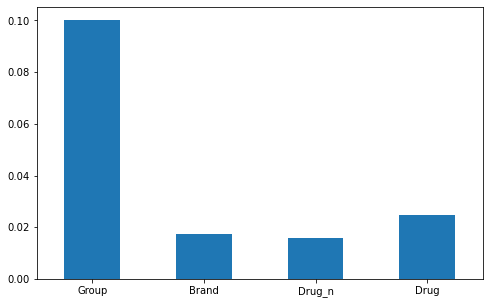

In [17]:
# check for the presence of digits
df4 = pd.DataFrame({'lab' : ['Group', 'Brand', 'Drug_n', 'Drug'], 'Count' : [(group['Name'].apply(lambda word: 1 if True in [t in string.digits or t == '-' for t in word] else 0).sum())/group.shape[0],
                                                                            (brand['Name'].apply(lambda word: 1 if True in [t in string.digits or t == '-' for t in word] else 0).sum())/brand.shape[0],
                                                                            (drug['Name'].apply(lambda word: 1 if True in [t in string.digits or t == '-' for t in word] else 0).sum())/drug.shape[0],
                                                                            (drug_n['Name'].apply(lambda word: 1 if True in [t in string.digits or t == '-' for t in word] else 0).sum())/drug.shape[0]]})

ax = df4.plot.bar(x='lab', y = 'Count', figsize = (8,5), rot=0, legend = False)
ax.set_xlabel("")

print((group['Name'].apply(lambda word: 1 if True in [t in string.digits or t == '-' for t in word] else 0).sum())/group.shape[0])

0.4426656738644825


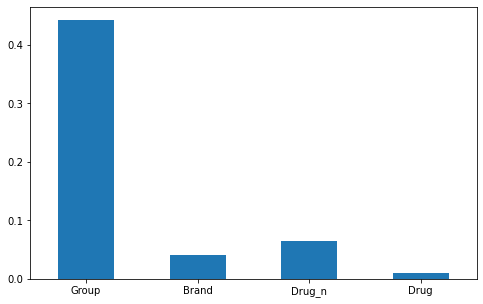

In [18]:
# check for the presence of spaces
df5 = pd.DataFrame({'lab' : ['Group', 'Brand', 'Drug_n', 'Drug'], 'Count' : [(group['Name'].apply(lambda word: 1 if True in [t == ' ' for t in word] else 0).sum())/group.shape[0],
                                                                            (brand['Name'].apply(lambda word: 1 if True in [ t == ' ' for t in word] else 0).sum())/brand.shape[0],
                                                                            (drug['Name'].apply(lambda word: 1 if True in [t == ' ' for t in word] else 0).sum())/drug.shape[0],
                                                                            (drug_n['Name'].apply(lambda word: 1 if True in [t  == ' ' for t in word] else 0).sum())/drug.shape[0]]})

ax = df5.plot.bar(x='lab', y = 'Count', figsize = (8,5), rot=0, legend = False)
ax.set_xlabel("")
print((group['Name'].apply(lambda word: 1 if True in [t == ' ' for t in word] else 0).sum())/group.shape[0])

#### Top Count Entities 

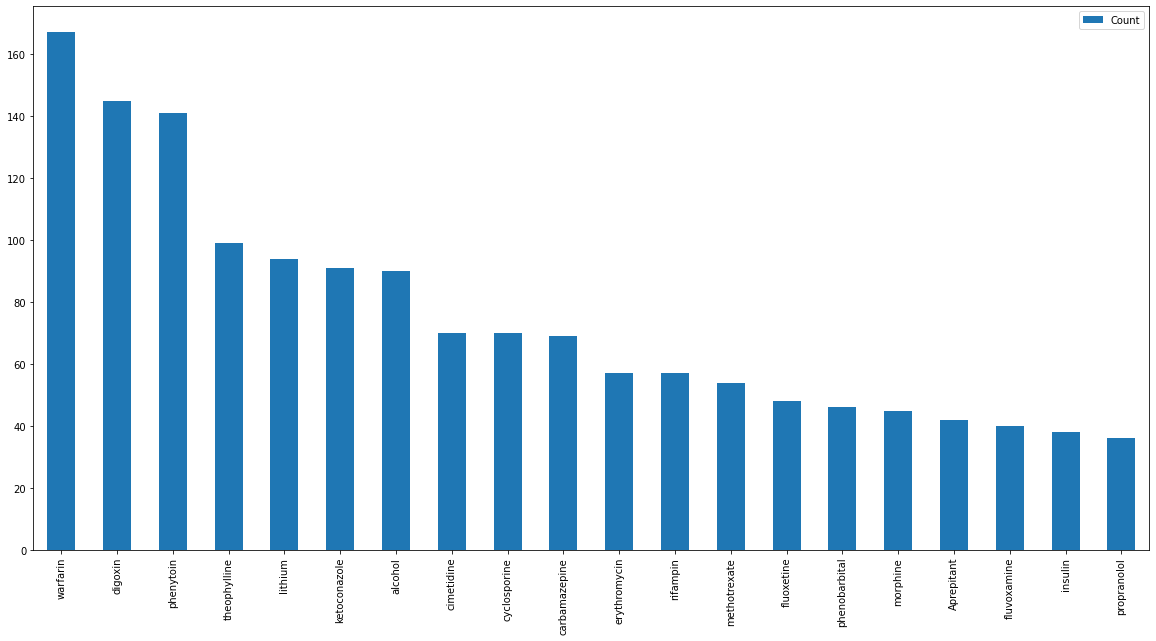

In [19]:
ax = drug_counts[(drug_counts["Count"] > 35)].plot.bar()

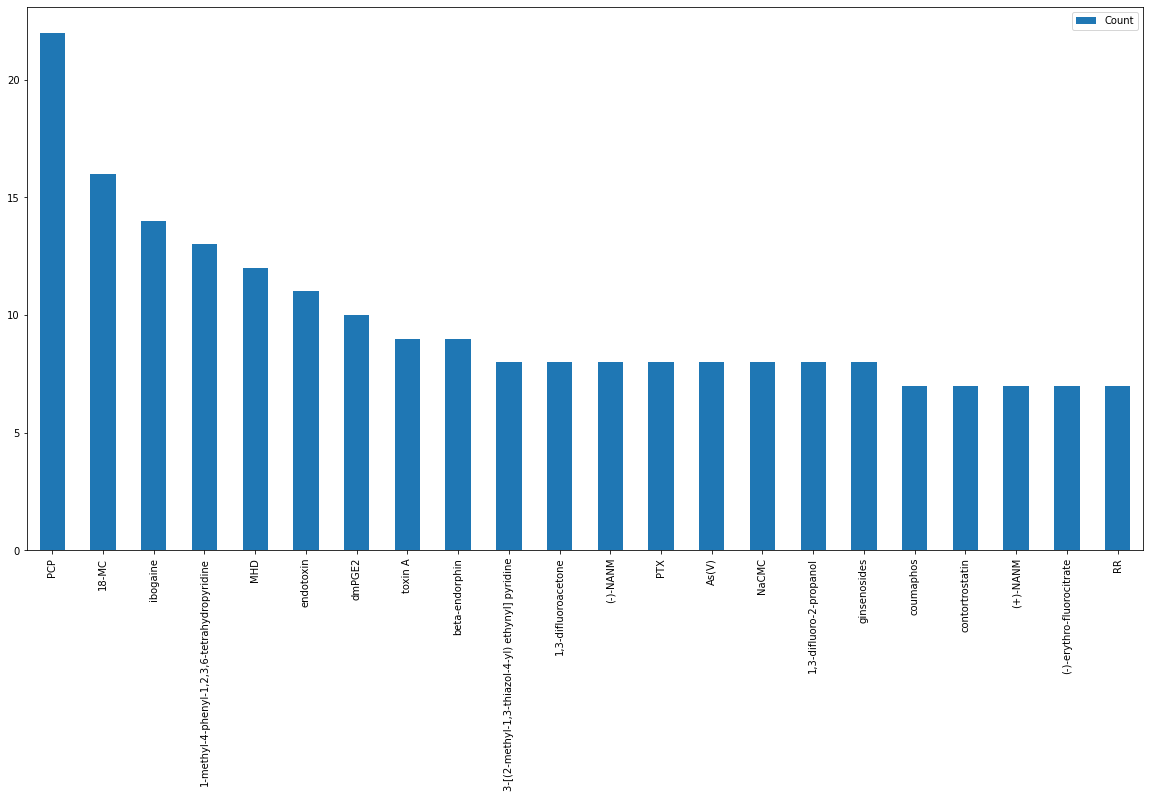

In [20]:
ax0 = drug_n_counts[(drug_n_counts["Count"] > 6)].plot.bar(rot = 90)

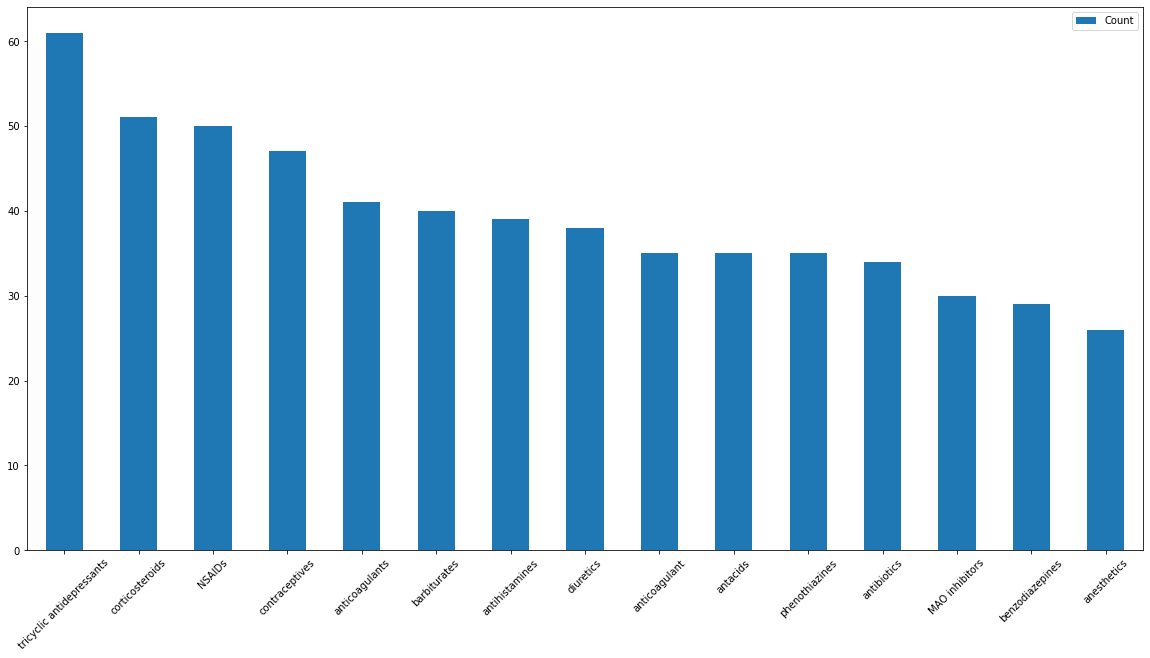

In [21]:
ax1 = group_counts[(group_counts["Count"] > 25)].plot.bar(rot = 45)

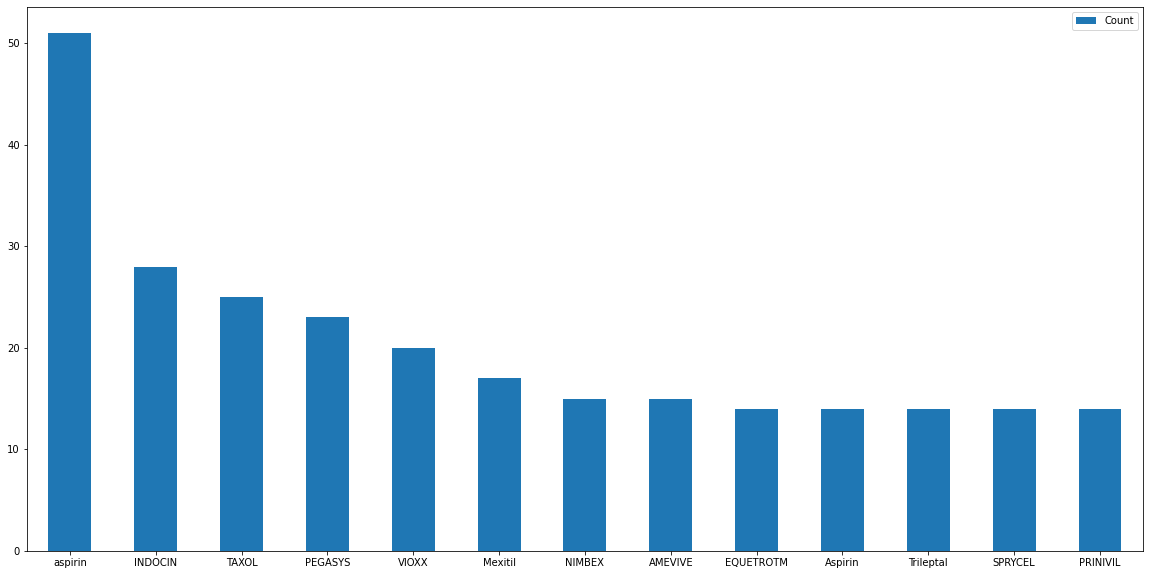

In [22]:
ax2 = brand_counts[(brand_counts["Count"] > 13)].plot.bar(rot = 0)

### Count Suffixes and Prefixes